### Sentiment Statistics

In [3]:
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns``
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
import jieba
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import glob

#### Sentiment Distribution

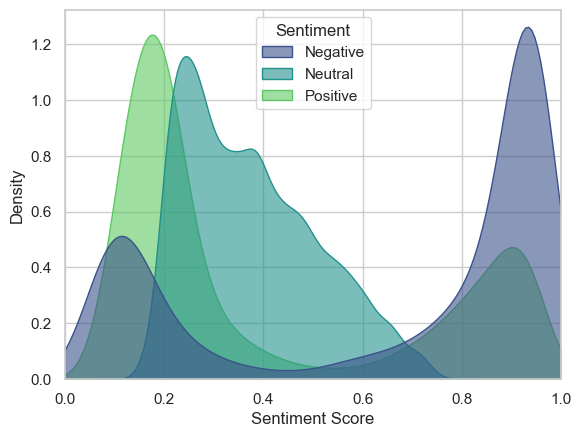

In [13]:
# Set seaborn whitegrid theme
sns.set_theme(style="whitegrid")

# Path to the folder containing CSV files
folder_path = "/Users/leida/TransBert/senti_results"

# Read all CSV files in the folder
all_files = glob.glob(folder_path + "/*.csv")

# Initialize an empty list to store DataFrames
dfs = []

# Loop through the list of files and read each one into a DataFrame
for file in all_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
data = pd.concat(dfs, ignore_index=True)

# Melt the DataFrame to long format for seaborn
data_melted = pd.melt(data, id_vars=['id', 'bid', 'user_id', '用户昵称', '微博正文', '头条文章url', '发布位置', '艾特用户', '话题', '转发数', '评论数', '点赞数', '发布时间', '发布工具', '微博图片url', '微博视频url', 'retweet_id', 'ip'], value_vars=['Negative', 'Neutral', 'Positive'], var_name='Sentiment', value_name='Value')

# Density plot with normalization
p = sns.kdeplot(data=data_melted, x="Value", hue="Sentiment", fill=True, common_norm=True, alpha=0.6, palette="viridis", legend=True)

# Control x limit
plt.xlim(0, 1)

# Add axis names        
plt.xlabel("Sentiment Score")
plt.ylabel("Density")

# Show the graph
plt.show()

####  Random Samples

In [33]:
# Path to the folder containing CSV files
folder_path = "/Users/leida/TransBert/senti_results"

# Read all CSV files in the folder
all_files = glob.glob(folder_path + "/*.csv")

# Initialize an empty list to store DataFrames
dfs = []

# Loop through the list of files and read each one into a DataFrame
for file in all_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
data = pd.concat(dfs, ignore_index=True)
# Randomly sample 500 rows from the DataFrame
add_sampled_data = data.sample(n=2000, random_state=1)

sampled_data_renamed = add_sampled_data.rename(columns={
    '用户昵称': 'Username',
    '发布工具': 'From',
    '微博正文': 'Blog',
    '发布时间': 'Time'
})


sampled_data_selected = sampled_data_renamed[['Username', 'From', 'Blog', 'Time']]

sampled_data_selected.loc[:, "Time"] = pd.to_datetime(sampled_data_selected["Time"])

service_sampled = pd.read_excel('service_sampled.xlsx')

# 合并数据
combined_data = pd.concat([service_sampled, sampled_data_selected], ignore_index=True)

combined_data = combined_data.assign(Negative=0, Neutral=0, Positive=0)

# 保存合并后的数据
combined_data.to_excel('4500_sampled.xlsx', index=False)

### Sentiment Analysis

In [5]:
import pandas as pd
import os
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [36]:
test_results = pd.read_csv('./senti_results_eva/senti_cleaned_4500_samples_LUO.csv')
test_results = test_results[test_results['Code'] != 0]

# Randomly sample 50% of the rows
sampled_test_results = test_results.sample(frac=0.3, random_state=1)
# Assign the values of Negative, Neutral, Positive to Neg, Neu, Pos respectively
test_results.loc[sampled_test_results.index, 'Neg'] = sampled_test_results['Negative']
test_results.loc[sampled_test_results.index, 'Neu'] = sampled_test_results['Neutral']
test_results.loc[sampled_test_results.index, 'Pos'] = sampled_test_results['Positive']

In [37]:
y_true = []
y_pred = []

for idx, row in test_results.iterrows():
    if row['Negative'] == 1:
        y_true.append('negative')
    elif row['Neutral'] == 1:
        y_true.append('neutral')
    else:
        y_true.append('positive')
        
    if row['Neg'] == 1:
        y_pred.append('negative')
    elif row['Neu'] == 1:
        y_pred.append('neutral')
    else:
        y_pred.append('positive')


# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=None, labels=['negative', 'neutral', 'positive'])
print(f'Accuracy: {accuracy:.3f}')
print('Per class metrics:')
print('Class\t\tPrecision\tRecall\t\tF1-Score')
for i, class_name in enumerate(['Negative', 'Neutral', 'Positive']):
    print(f'{class_name}\t{precision[i]:.3f}\t\t{recall[i]:.3f}\t\t{f1[i]:.3f}')

Accuracy: 0.827
Per class metrics:
Class		Precision	Recall		F1-Score
Negative	0.932		0.870		0.900
Neutral	0.298		0.246		0.269
Positive	0.616		0.882		0.725


In [32]:
code_ls = [1,3,4,5,6,7,8,9]
accuracy_ls = []
precision_ls = []
recall_ls = []
f1_ls = []
for each_code in code_ls:
    curr_results = test_results[test_results['Code'] == each_code]
    # Convert ground truth to single array
    y_true = []
    y_pred = []

    for idx, row in curr_results.iterrows():
        if row['Negative'] == 1:
            y_true.append('negative')
        elif row['Neutral'] == 1:
            y_true.append('neutral')
        else:
            y_true.append('positive')
            
        if row['Neg'] == 1:
            y_pred.append('negative')
        elif row['Neu'] == 1:
            y_pred.append('neutral')
        else:
            y_pred.append('positive')


    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=None, labels=['negative', 'neutral', 'positive'])
    accuracy_ls.append(accuracy)
    precision_ls.append(precision)
    recall_ls.append(recall)
    f1_ls.append(f1)

    # Print results
    print('\n')
    if each_code == 1:
        print("Reliability")
    elif each_code == 3:
        print("Crowdedness")
    elif each_code == 4:
        print("Staff")
    elif each_code == 5:
        print("Comfort")
    elif each_code == 6:
        print("Safety")
    elif each_code == 7:
        print("Queue")
    elif each_code == 8:
        print("Service facilities")
    elif each_code == 9:
        print("Others")
    print(f'Accuracy: {accuracy:.3f}')
    print('Per class metrics:')
    print('Class\t\tPrecision\tRecall\t\tF1-Score')
    for i, class_name in enumerate(['Negative', 'Neutral', 'Positive']):
        print(f'{class_name}\t{precision[i]:.3f}\t\t{recall[i]:.3f}\t\t{f1[i]:.3f}')



Reliability
Accuracy: 0.828
Per class metrics:
Class		Precision	Recall		F1-Score
Negative	0.934		0.879		0.906
Neutral	0.333		0.227		0.270
Positive	0.333		0.917		0.489


Crowdedness
Accuracy: 0.762
Per class metrics:
Class		Precision	Recall		F1-Score
Negative	0.965		0.801		0.875
Neutral	0.069		0.095		0.080
Positive	0.182		0.800		0.296


Staff
Accuracy: 0.873
Per class metrics:
Class		Precision	Recall		F1-Score
Negative	0.792		0.953		0.865
Neutral	0.800		0.500		0.615
Positive	0.961		0.849		0.901


Comfort
Accuracy: 0.845
Per class metrics:
Class		Precision	Recall		F1-Score
Negative	0.945		0.890		0.917
Neutral	0.357		0.312		0.333
Positive	0.583		0.875		0.700


Safety
Accuracy: 0.871
Per class metrics:
Class		Precision	Recall		F1-Score
Negative	0.922		0.934		0.928
Neutral	0.250		0.167		0.200
Positive	0.500		0.667		0.571


Queue
Accuracy: 0.774
Per class metrics:
Class		Precision	Recall		F1-Score
Negative	0.928		0.821		0.871
Neutral	0.000		0.000		0.000
Positive	0.167		0.333		0.222


Servi

#### Word Cloud

In [23]:
# Define the folder path
folder_path = "/Users/leida/TransBert/senti_results"

# Get a list of all CSV files in the folder
all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

# Initialize lists to store positive and negative texts
positive_ls = []
negative_ls = []

# Loop through the list of files and read each one into a DataFrame
for file in all_files:
    df = pd.read_csv(file)
    for index, row in df.iterrows():
        if row['Positive'] > row['Negative']:
            positive_ls.append(row['微博正文'])
        else:
            negative_ls.append(row['微博正文'])

positive_ls = ' '.join(positive_ls)
negative_ls = ' '.join(negative_ls)
# Print the results
print("Positive List:", positive_ls)
print("Negative List:", negative_ls)

Positive List: 不管是工作日的晚上11点还是周末的晚上11点深圳地铁上永远不缺人甚者还是会没有位置坐比如今天加班到现在的我还在三号线上站着终于月底了下个月就可以好好玩去了 深圳坐地铁高峰期时人们都会非常自觉排队的每次下班到达地铁时就会看到站着一列又一列的队伍然后当地铁来临时再有序的先下后上这里做的真的很好！哈哈哈希望在长沙坐地铁时也能如此～ 惠州买房最好、最靠谱的投资思路，在你对惠州不了解的情况下，这条思路一定是最保险的！那就是根据自身的实际情况，以深圳地铁14号线沙田站为基点，在它的辐射范围内去考虑和比较楼盘。因为14号线深圳段明年底就会通车，届时距离沙田站越近的房子，出行将越方便，不管是大亚湾的一线临深地带，还是万达商圈，以及惠阳的白云新城，基本上一个小时内便可到达福田岗厦，未来要出手自然更受深圳刚需的青睐！ 提前下班也被这场暴雨临幸#深圳暴雨#心疼我的鞋子暖心的深圳地铁在出站口给发雨衣谢谢@深圳地铁 最喜欢坐地铁了，经济快速不堵车，关键是环境还好。每次坐地铁都会不自觉的想起在深圳为梦想奋斗的岁月。 广州今天和别人的女朋友去黄埔那边看房子，那边定位为广州第二个CBD经济区地段听不错的旁边就是国际金融城了，看中了一套35平方loft首付10万带精装，交通非常方便距离地铁口800米，回去珠江新城上班20分钟就可以到了☎️18802541804#夏季奇葩防晒大赏#广州#五月生活碎片##广州塔#深圳#珠江新城##广州市-番禺区##广州市-黄埔区##广州市-天河区##东莞##天河城# 深圳地铁新线车站的建设可针不戳，大字壁是真的好看当然2，8号线这种名场面怎么能错过呢存货放不完了，就这样吧 #关注深圳冠状病毒肺炎疫情最新进展#【筑牢深圳疫情防控防线，他们在行动】“5·21”疫情发生后，深圳立即启动应急响应，科学精准做好排查检测、流调溯源等各项处置工作。为阻断疫情传播链条，广大医护人员迅速集结出征，不惧酷暑，不怕辛劳，奋战在重点区域核酸检测点，确保“应检尽检，愿检尽检”。在深圳高铁站、地铁站等人流密集区域，相关部门也持续加强消杀保洁、进站测温等各项防疫措施，保障市民安全出行。#深圳疫情#O筑牢深圳疫情防控防线，他们在行动 SEVENTEEN👼JEONGHAN尹净汉[210531]Naver更新SEVENTEEN净汉"不变的东西是？我的美貌.."依旧很帅"[ST

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

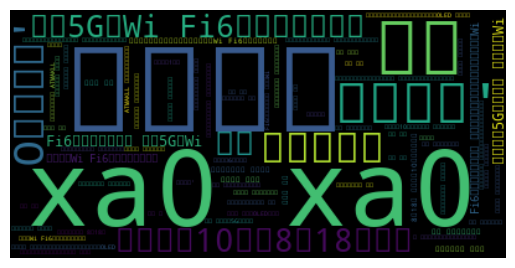

In [ ]:
import jieba
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white',  
                        max_words = 100,
                        # 如果不设置中文字体，可能会出现乱码
                        font_path = '/System/Library/Fonts/STHeiti Light.ttc')

wordcloud.generate(positive_ls)

plt.figure(figsize = (14, 8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')